In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
# SITE & BUILDING CONSTANTS:

SITE_WIDTH = 200
SITE_HEIGHT = 140
BOUNDARY_GAP = 10
BUILDING_GAP = 15

TOWER_A = (30, 20)
TOWER_B = (20, 20)

NEIGHBOR_DISTANCE = 60



In [3]:
# Central Plaza (centered)
PLAZA_SIZE = 40
PLAZA_X = (SITE_WIDTH - PLAZA_SIZE) / 2
PLAZA_Y = (SITE_HEIGHT - PLAZA_SIZE) / 2


In [4]:
# HELPER FUNCTIONS:

def rectangles_overlap(r1, r2):
    return not (
        r1['x'] + r1['w'] <= r2['x'] or
        r2['x'] + r2['w'] <= r1['x'] or
        r1['y'] + r1['h'] <= r2['y'] or
        r2['y'] + r2['h'] <= r1['y']
    )

def edge_distance(b1, b2):
    dx = max(b2['x'] - (b1['x'] + b1['w']), b1['x'] - (b2['x'] + b2['w']), 0)
    dy = max(b2['y'] - (b1['y'] + b1['h']), b1['y'] - (b2['y'] + b2['h']), 0)
    return math.sqrt(dx*dx + dy*dy)

def center_distance(b1, b2):
    c1x = b1['x'] + b1['w']/2
    c1y = b1['y'] + b1['h']/2
    c2x = b2['x'] + b2['w']/2
    c2y = b2['y'] + b2['h']/2
    return math.sqrt((c1x-c2x)**2 + (c1y-c2y)**2)


In [5]:
# VALIDATION CHECKS: 

def is_valid(buildings):
    plaza = {'x': PLAZA_X, 'y': PLAZA_Y, 'w': PLAZA_SIZE, 'h': PLAZA_SIZE}

    # Plaza overlap
    for b in buildings:
        if rectangles_overlap(b, plaza):
            return False

    # Building distance
    for i in range(len(buildings)):
        for j in range(i+1, len(buildings)):
            if edge_distance(buildings[i], buildings[j]) < BUILDING_GAP:
                return False
            
             # Neighbor rule
    for b in buildings:
        if b['type'] == 'A':
            if not any(
                other['type'] == 'B' and center_distance(b, other) <= NEIGHBOR_DISTANCE
                for other in buildings
            ):
                return False

    return True

In [6]:
# LAYOUT GENERATION: 

def generate_layout():
    buildings = []
    for _ in range(random.randint(4, 7)):
        btype = random.choice(['A', 'B'])
        w, h = TOWER_A if btype == 'A' else TOWER_B

        for _ in range(50):
            x = random.uniform(BOUNDARY_GAP, SITE_WIDTH - w - BOUNDARY_GAP)
            y = random.uniform(BOUNDARY_GAP, SITE_HEIGHT - h - BOUNDARY_GAP)

            new_building = {'type': btype, 'x': x, 'y': y, 'w': w, 'h': h}

            if all(edge_distance(new_building, b) >= BUILDING_GAP for b in buildings):
                buildings.append(new_building)
                break

    return buildings if is_valid(buildings) else None


In [7]:
# VISUALIZATION:

def plot_layout(buildings, idx):
    fig, ax = plt.subplots()

    # Site boundary
    ax.add_patch(plt.Rectangle((0,0), SITE_WIDTH, SITE_HEIGHT, fill=False))

    # Plaza
    ax.add_patch(plt.Rectangle((PLAZA_X, PLAZA_Y), PLAZA_SIZE, PLAZA_SIZE,
                               color='gray', alpha=0.4))

    for b in buildings:
        color = 'blue' if b['type'] == 'A' else 'green'
        ax.add_patch(plt.Rectangle((b['x'], b['y']), b['w'], b['h'], color=color))
        ax.text(b['x'], b['y'], b['type'])

    ax.set_title(f"Layout {idx}")
    ax.set_xlim(0, SITE_WIDTH)
    ax.set_ylim(0, SITE_HEIGHT)
    ax.set_aspect('equal')
    plt.show()


Layout 1
Tower A: 1
Tower B: 4
Total Built Area: 2200


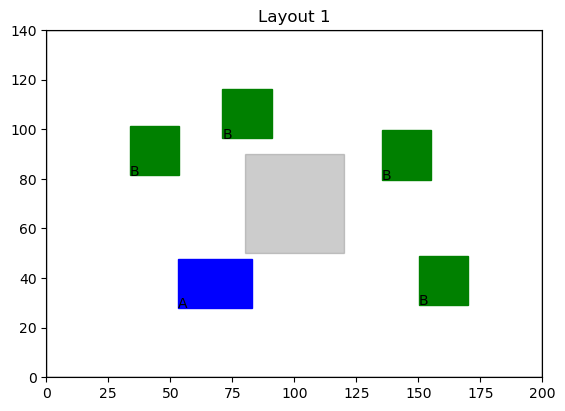


Layout 2
Tower A: 3
Tower B: 3
Total Built Area: 3000


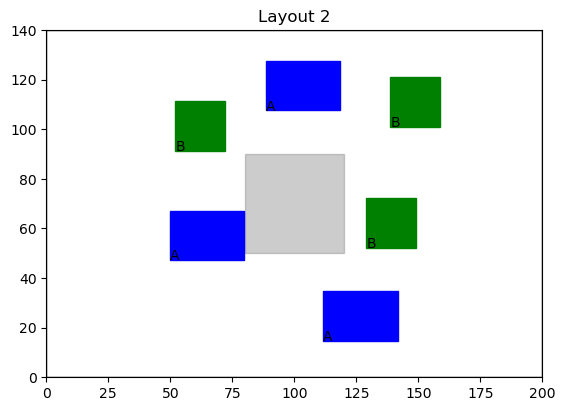

In [8]:
# MAIN EXECUTION:

layouts = []
while len(layouts) < 2:
    layout = generate_layout()
    if layout:
        layouts.append(layout)

for i, layout in enumerate(layouts, 1):
    count_a = sum(b['type']=='A' for b in layout)
    count_b = sum(b['type']=='B' for b in layout)
    area = sum(b['w']*b['h'] for b in layout)

    print(f"\nLayout {i}")
    print("Tower A:", count_a)
    print("Tower B:", count_b)
    print("Total Built Area:", area)

    plot_layout(layout, i)